<a href="https://colab.research.google.com/github/feetfetish999666-max/Conjectura-de-Hodge/blob/main/introducao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mostrando exemplos de Hodge diamonds...


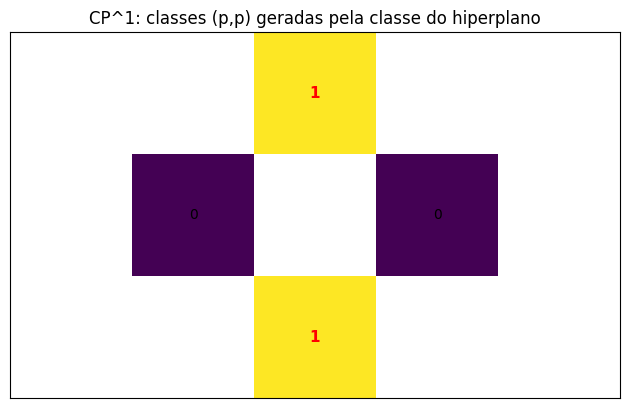

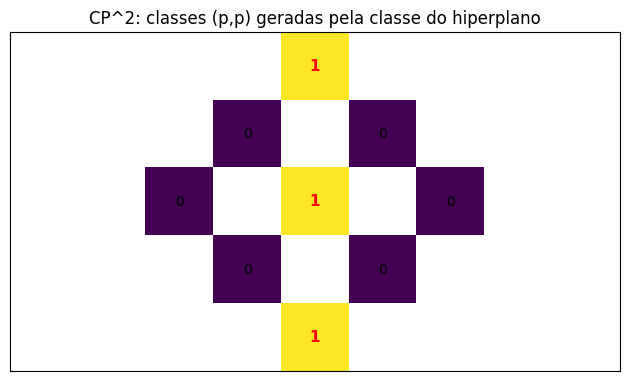

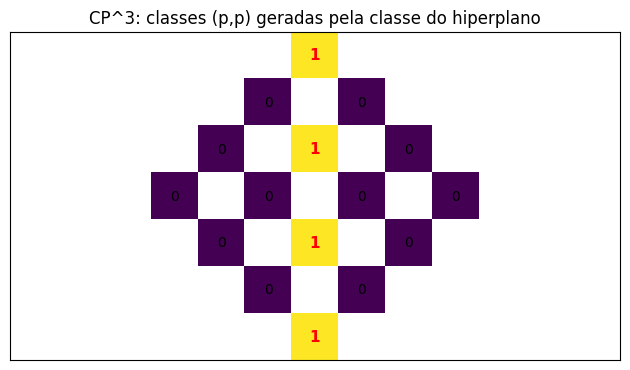

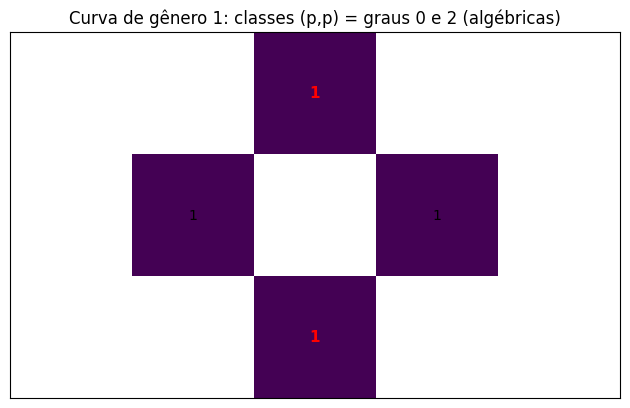

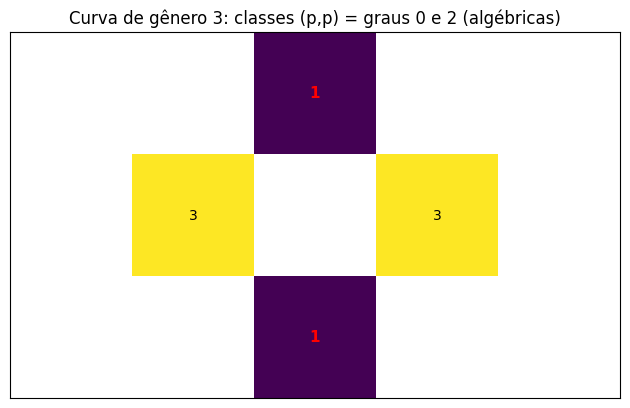

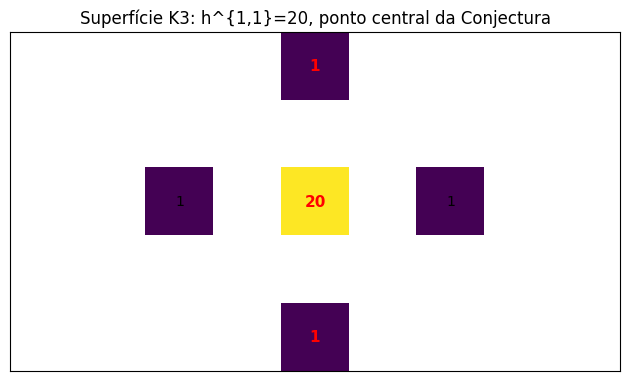


Resumo:
- Em CP^n, todas as classes da diagonal são algébricas → Conjectura de Hodge vale.
- Em curvas, só aparecem classes em (0,0) e (1,1) → também algébricas.
- Em K3, H^{1,1} tem dimensão 20 → entender quais são algébricas é muito profundo!



In [1]:
# -*- coding: utf-8 -*-
"""
Explicação didática da Conjectura de Hodge em Python
---------------------------------------------------

Este script mostra os Hodge diamonds de alguns exemplos clássicos:
 - Espaço projetivo complexo CP^n
 - Curvas de gênero g
 - Superfície K3

E destaca onde ficam as Hodge classes (p=p), que são as protagonistas
da Conjectura de Hodge.
"""

import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# Funções utilitárias
# -------------------------
def hodge_diamond_from_dict(h):
    """Constrói matriz para visualizar o Hodge diamond a partir de um dicionário {(p,q): valor}."""
    if not h:
        return np.zeros((1,1), dtype=int)
    maxdeg = max(p+q for (p,q) in h.keys())
    rows = maxdeg + 1
    cols = 2*maxdeg + 1
    M = np.full((rows, cols), fill_value=np.nan)
    center = cols // 2
    for (p,q), val in h.items():
        k = p + q
        col = center + (p - q)
        M[k, col] = val
    return M

def plot_hodge_diamond(h, title="Hodge diamond", mark_pp=True):
    """Plota o losango de Hodge, destacando as classes (p,p)."""
    M = hodge_diamond_from_dict(h)
    fig = plt.figure()
    plt.imshow(M, interpolation='none')
    plt.title(title)
    plt.xticks([]); plt.yticks([])
    center = M.shape[1]//2
    for (p,q), val in h.items():
        k = p + q
        col = center + (p - q)
        if mark_pp and p == q:
            plt.text(col, k, str(val), ha='center', va='center', fontsize=11, fontweight='bold', color='red')
        else:
            plt.text(col, k, str(val), ha='center', va='center', fontsize=10)
    plt.tight_layout()
    plt.show()

# -------------------------
# Exemplos clássicos
# -------------------------
def hodge_cp_n(n):
    """Espaço projetivo complexo CP^n: h^{p,q} = 1 se p=q, senão 0."""
    return {(p,q): (1 if p==q else 0) for p in range(n+1) for q in range(n+1)}

def hodge_curve_genus(g):
    """Curva complexa suave de gênero g (dim=1)."""
    return {(0,0): 1, (1,1): 1, (1,0): g, (0,1): g}

def hodge_k3():
    """Superfície K3 (dim=2)."""
    return {(0,0): 1, (1,1): 20, (2,2): 1, (2,0): 1, (0,2): 1}

# -------------------------
# Execução
# -------------------------
print("Mostrando exemplos de Hodge diamonds...")

# CP^n
for n in [1,2,3]:
    plot_hodge_diamond(hodge_cp_n(n), title=f"CP^{n}: classes (p,p) geradas pela classe do hiperplano")

# Curvas
for g in [1,3]:
    plot_hodge_diamond(hodge_curve_genus(g), title=f"Curva de gênero {g}: classes (p,p) = graus 0 e 2 (algébricas)")

# K3
plot_hodge_diamond(hodge_k3(), title="Superfície K3: h^{1,1}=20, ponto central da Conjectura")

print("""
Resumo:
- Em CP^n, todas as classes da diagonal são algébricas → Conjectura de Hodge vale.
- Em curvas, só aparecem classes em (0,0) e (1,1) → também algébricas.
- Em K3, H^{1,1} tem dimensão 20 → entender quais são algébricas é muito profundo!
""")

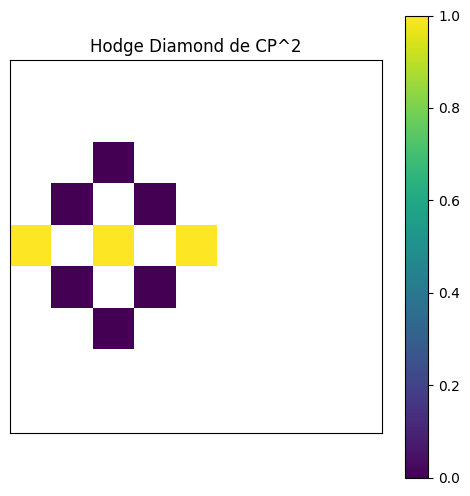

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def hodge_diamond_cp_n(n):
    """Exemplo do espaço projetivo complexo CP^n"""
    h = {(p, q): 1 if p == q else 0 for p in range(n+1) for q in range(n+1)}
    return h

def plot_hodge_diamond(h, title="Hodge Diamond"):
    max_deg = max(p + q for p, q in h)
    size = max_deg * 2 + 1
    diamond = np.full((size, size), np.nan)

    center = size // 2
    for (p, q), val in h.items():
        idx = p + q
        diamond[center + (p - q), idx] = val

    plt.figure(figsize=(6,6))
    plt.imshow(diamond, cmap='viridis', interpolation='none')
    plt.title(title)
    plt.xticks([]); plt.yticks([])
    plt.colorbar()
    plt.show()

# Exemplo para CP^2
h_cp2 = hodge_diamond_cp_n(2)
plot_hodge_diamond(h_cp2, title="Hodge Diamond de CP^2")

# Nova seção

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import sympy as sp

# Variável principal
x = sp.Symbol('x')

def gerar_polinomio(n):
    """
    Gera um polinômio genérico de grau n com coeficientes k0, k1, ..., kn.
    Retorna: polinômio simbólico, lista de coeficientes.
    """
    ks = sp.symbols(f'k0:{n+1}')  # gera k0, k1, ..., kn
    P = sum(ks[i] * x**(n-i) for i in range(n+1))
    return P, ks

def analisar_polinomio(n):
    """
    Mostra propriedades básicas de um polinômio de grau n.
    """
    P, ks = gerar_polinomio(n)
    print(f"\nPolinômio de grau {n}:")
    sp.pprint(P)

    # Raízes
    roots = sp.solve(P, x)
    print("\nRaízes simbólicas:")
    sp.pprint(roots)

    # Relações de Viète
    print("\nRelações de Viète:")
    soma_raizes = -ks[1]/ks[0]
    print(f"Soma das raízes = {soma_raizes}")

    if n >= 2:
        soma_prod_dois = ks[2]/ks[0]
        print(f"Soma dos produtos de 2 a 2 = {soma_prod_dois}")
    if n >= 3:
        soma_prod_tres = -ks[3]/ks[0]
        print(f"Soma dos produtos de 3 a 3 = {soma_prod_tres}")

    prod_raizes = (-1)**n * ks[-1]/ks[0]
    print(f"Produto das raízes = {prod_raizes}")

    # Discriminante (se for grau até 4, o sympy calcula)
    if n <= 4:
        D = sp.discriminant(P, x)
        print("\nDiscriminante:")
        sp.pprint(D)

# -------------------
# Exemplos de uso
# -------------------
analisar_polinomio(2)  # Quadrática
analisar_polinomio(3)  # Cúbica


Polinômio de grau 2:
    2            
k₀⋅x  + k₁⋅x + k₂

Raízes simbólicas:
⎡         ________________           ________________⎤
⎢        ╱              2           ╱              2 ⎥
⎢-k₁ - ╲╱  -4⋅k₀⋅k₂ + k₁    -k₁ + ╲╱  -4⋅k₀⋅k₂ + k₁  ⎥
⎢─────────────────────────, ─────────────────────────⎥
⎣          2⋅k₀                       2⋅k₀           ⎦

Relações de Viète:
Soma das raízes = -k1/k0
Soma dos produtos de 2 a 2 = k2/k0
Produto das raízes = k2/k0

Discriminante:
             2
-4⋅k₀⋅k₂ + k₁ 

Polinômio de grau 3:
    3       2            
k₀⋅x  + k₁⋅x  + k₂⋅x + k₃

Raízes simbólicas:
⎡                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                                           